# Variational Quantum Linear Solver for Newton-Raphson 
As explained in the previous notebook, the Newton Raphson approach relies on the solution of a linear system. Several quantum linear solvers have been developped, one of them being the Variational Quantum linear solver. This solver uses a variational approach to solve the system of linear equations.

## Example 
To make things clearer let's consider the following example:

$$
f_1(x,y,z) = 2x^3 - x y+ 4z -12 \\
f_2(x,y,z) = -4x + z^5 + 8 z y \\
f_3(x,y,z) = 3x^3 +z^5 + 8 z y
$$

That we define in the following function

In [1]:
import numpy as np
def func(input):
    def f1(x,y):
        return 0.1*(2*x**3 - 4* y)
    def f2(x,y):
        return 0.1*(- 4 * x + 8*y**2)
    x, y = input
    return np.array([f(x,y) for f in[f1,f2]])

# Using VQSL to solve the linear system

The `QuantumNewtonRaphson` can use our `vqls` solver to solve the linear system of equations at the hart of the newton raphson routine.  

In [2]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import CG
from quantum_newton_raphson.newton_raphson import newton_raphson
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER

estimator = Estimator()
ansatz = RealAmplitudes(1, entanglement='full', reps=3)
optim = CG(maxiter=1000, tol=1E-10)

# define the linear solver with the reorder solver
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition="symmetric")

# Solve the newton raphson problem
res = newton_raphson(func, np.random.rand(2), linear_solver=solver, verbose=True, max_iter=10)


0/10 error = 0.17893052629697126(1e-10)
[[ 0.56968578 -0.4       ]
 [-0.4         0.8213818 ]] [-0.02030947 -0.17893053]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


1/10 error = 0.10219514544130473(1e-10)
[[ 0.95409594 -0.4       ]
 [-0.4         1.39324234]] [0.05273265 0.10219515]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


2/10 error = 0.008229883325539866(1e-10)
[[ 0.81185272 -0.4       ]
 [-0.4         1.23095944]] [0.00704874 0.00822988]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


3/10 error = 0.000141329763685194(1e-10)
[[ 0.7920706  -0.4       ]
 [-0.4         1.21284854]] [0.00014133 0.0001025 ]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


4/10 error = 4.8510997929795967e-08(1e-10)
[[ 0.79170486 -0.4       ]
 [-0.4         1.21257333]] [4.85109979e-08 2.36762630e-08]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


We can check the solution of the linear system within he NR step obtained with VQLS for one of the iteration

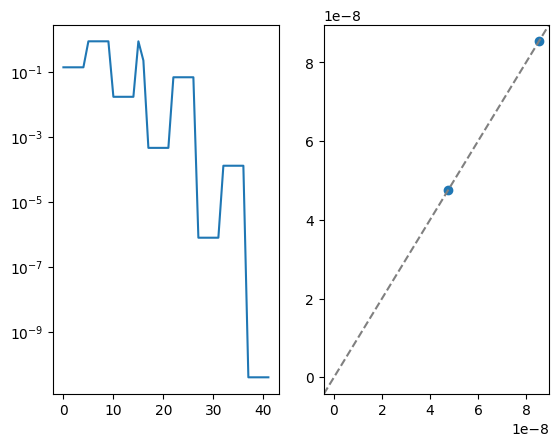

In [5]:
import matplotlib.pyplot as plt
# plt.semilogy([l.residue for l in res.linear_solver_results])
n = 4
plt.subplot(121)
plt.semilogy(res.linear_solver_results[n].logger.values)
plt.subplot(122)
plt.scatter(res.linear_solver_results[n].ref, res.linear_solver_results[n].solution)
_ = plt.axline( (0,0), slope=1,linestyle='--',color='grey')


We can check the solution against the solution obatined via a classical newton raphson 

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


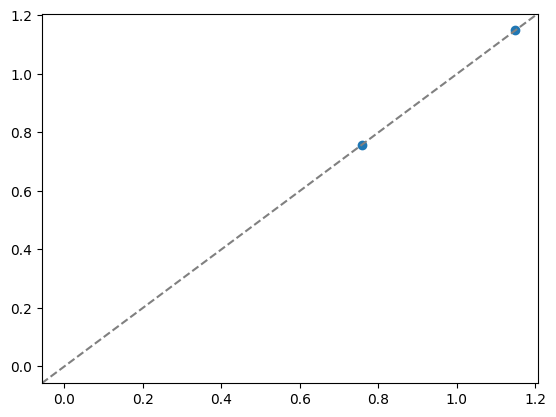

In [4]:
import matplotlib.pyplot as plt
res_ref = newton_raphson(func, np.random.rand(2))
plt.scatter(res_ref.solution, res.solution)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')